### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [71]:
data = pd.read_csv('data/coupons.csv')

In [72]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Shape of the dataset: (12684, 26)

Columns in the dataset:
 ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']

Missing values for each column:
 car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
weather                     0
temperature                 0
destination                 0
passanger                   0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
income                      0
occupation                  0
has_

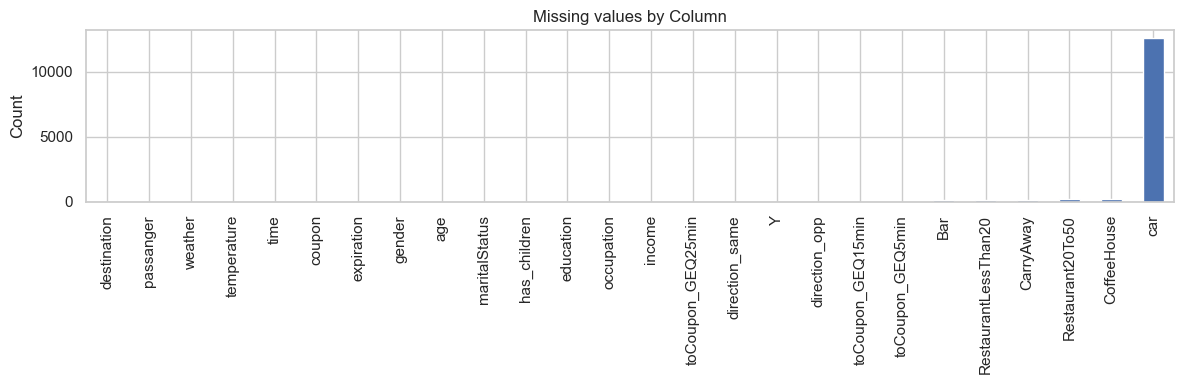

In [73]:
#Get information about the dataset and the columns
print("Shape of the dataset:", data.shape)
print("\nColumns in the dataset:\n", data.columns.tolist())

#Get the number of missing values for each column in the dataset
missing_data = data.isnull().sum().sort_values(ascending = False)
print("\nMissing values for each column:\n",missing_data)

#Plot the missing values data in a bar plot.
data.isnull().sum().sort_values().plot(kind = 'bar', title = 'Missing values by Column', ylabel='Count', figsize=(12, 4))
plt.tight_layout()
plt.savefig('images/missing_by_columns.png')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [74]:
# The car column has over 12576 missing values so let's drop that column.
data = data.drop(columns='car')

# Since the other missing values are in the hundreds, let's replace them with 'Unknown' object type
data = data.fillna('Unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon?



In [75]:
#The number of observations that accepted the coupons
Accepted = data['Y'].sum()
print("The number of observations that accepted the coupons: ",Accepted)

#The total number of observations in the dataset
Total_Observations = len(data)
print("The total number of observations in the dataset: ",Total_Observations)

Percent_Accepted = Accepted/Total_Observations
print(f"Proportion of the total observations chose to accept the coupon: {Percent_Accepted:.2%}")

The number of observations that accepted the coupons:  7210
The total number of observations in the dataset:  12684
Proportion of the total observations chose to accept the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

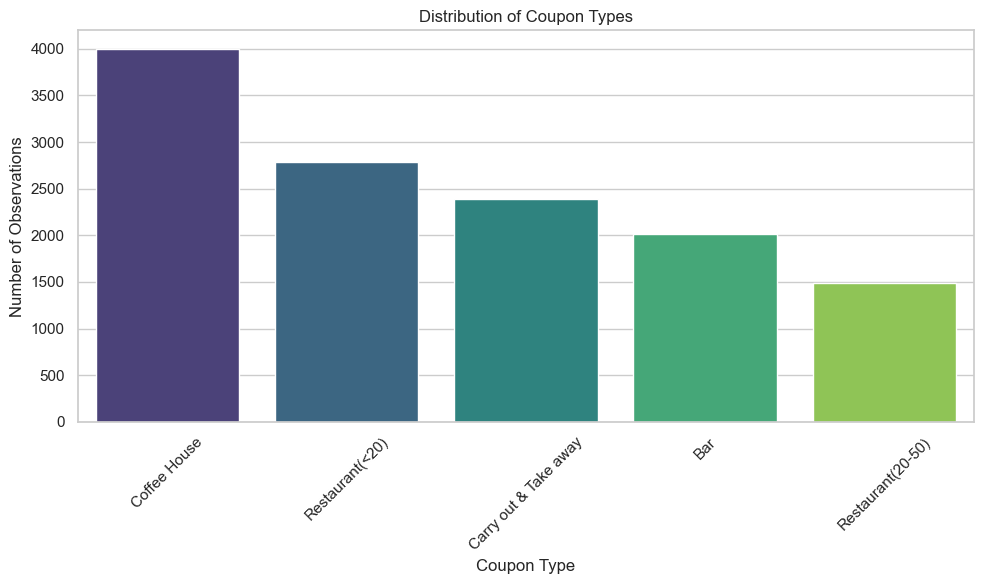

In [76]:
# Count values in the 'coupon' column
Coupon_Counts = data['coupon'].value_counts().reset_index()
Coupon_Counts.columns = ['coupon', 'count']

# Create bar plot with 'coupon' assigned to hue
plt.figure(figsize=(10, 6))
sns.barplot(data=Coupon_Counts, x='coupon', y='count', hue='coupon', palette='viridis', legend=False)

# Add labels and title
plt.xlabel("Coupon Type")
plt.ylabel("Number of Observations")
plt.title("Distribution of Coupon Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/coupon_types.png')
plt.show()

6. Use a histogram to visualize the temperature column.

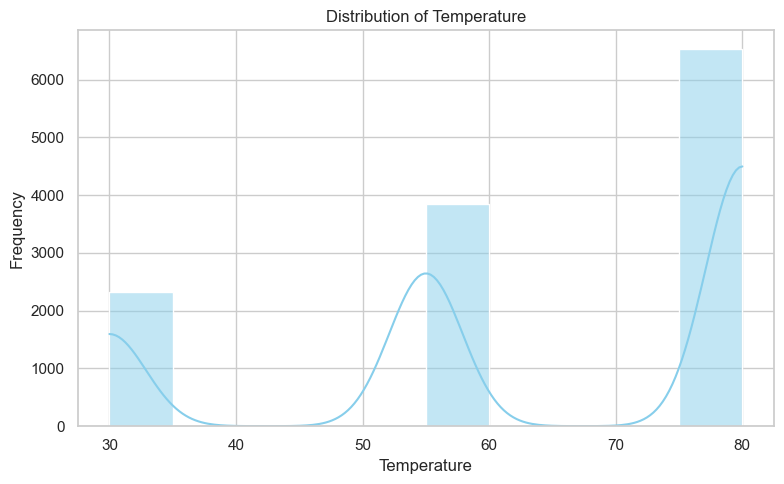

In [77]:
# Set plot style
sns.set(style="whitegrid")

# Create histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='temperature', bins=10, kde=True, color='skyblue')

# Add labels and title
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature")
plt.tight_layout()
plt.savefig('images/distribution_temperature.png')
plt.show()

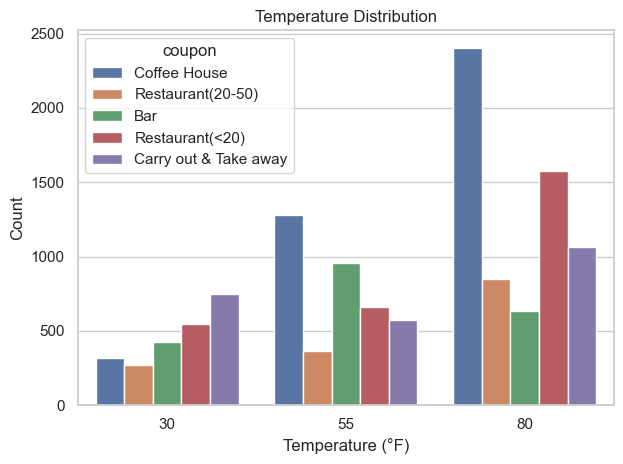

In [78]:
#Let's review the correlation between coupon and temperature

sns.countplot(data=data, x='temperature', hue='coupon')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/temperature_distribution.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [79]:
#Select the rows that have chosen a coupon for a Bar.
Bar_Coupons = data[data['coupon'] == 'Bar']

#Inspect the first couple for rows of this dataset.
Bar_Coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [80]:
# Calculate proportion of bar coupons that were accepted
Accepted_Bar_Coupons = Bar_Coupons['Y'].sum()
Total_Bar_Coupons = len(Bar_Coupons)
Bar_Acceptance_Rate = Accepted_Bar_Coupons / Total_Bar_Coupons

print(f"Proportion of accepted Bar coupons: {Bar_Acceptance_Rate:.2%}")

Proportion of accepted Bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [81]:
# Define frequency groups
low_freq = ['never', 'less than once', '1~3']
high_freq = ['4~8', 'gt8']

# Filter data
low_group = data[data['Bar'].isin(low_freq)]
high_group = data[data['Bar'].isin(high_freq)]

# Calculate acceptance rates
low_acceptance = low_group['Y'].mean()
high_acceptance = high_group['Y'].mean()

# Display results
print(f"Acceptance rate (≤3 visits/month): {low_acceptance:.2%}")
print(f"Acceptance rate (>3 visits/month): {high_acceptance:.2%}")

Acceptance rate (≤3 visits/month): 56.13%
Acceptance rate (>3 visits/month): 62.25%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [82]:
# Convert age to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Frequent bar-goers over age 25
freq_over_25 = data[(data['Bar'].isin(high_freq)) & (data['age'] > 25)]

# Rest of the bar goers
rest = data[~((data['Bar'].isin(high_freq)) & (data['age'] > 25))]

# Calculate acceptance rates
Acceptance_freq_over_25 = freq_over_25['Y'].mean()
Acceptance_rest = rest['Y'].mean()

# Display results
print(f"Acceptance rate (frequent bar-goers over 25): {Acceptance_freq_over_25:.2%}")
print(f"Acceptance rate (everyone else): {Acceptance_rest:.2%}")

Acceptance rate (frequent bar-goers over 25): 62.61%
Acceptance rate (everyone else): 56.40%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [83]:
# Define filters
excluded_occupations = ['Farming & Fishing', 'Forestry & Logging']

# Interested Group is the group of people that meets all the three conditions
interested_group = data[
    (data['Bar'].isin(high_freq)) &
    (data['passanger'] != 'Kid(s)') &
    (~data['occupation'].isin(excluded_occupations))
]

# Rest of the population from the dataset
rest = data[~(
    (data['Bar'].isin(high_freq)) &
    (data['passanger'] != 'Kid(s)') &
    (~data['occupation'].isin(excluded_occupations))
)]

# Calculate acceptance rates
Acceptance_rate_interested_group = interested_group['Y'].mean()
Acceptance_rate_rest = rest['Y'].mean()

# Display results
print(f"Acceptance rate (Group A): {Acceptance_rate_interested_group:.2%}")
print(f"Acceptance rate (Group B): {Acceptance_rate_rest:.2%}")

Acceptance rate (Group A): 62.24%
Acceptance rate (Group B): 56.18%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [84]:
# Define categories
bar_freq = ['4~8', 'gt8']
cheap_rest_freq = ['4~8', 'gt8']
low_income = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Condition 1
cond1 = (
    data['Bar'].isin(bar_freq) &
    (data['passanger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
)

# Condition 2
cond2 = (
    data['Bar'].isin(bar_freq) &
    (data['age'] < 30)
)

# Condition 3
cond3 = (
    data['RestaurantLessThan20'].isin(cheap_rest_freq) &
    data['income'].isin(low_income)
)
# Group A: meets any of the three conditions
group_a = data[cond1 | cond2 | cond3]

# Group B: all others
group_b = data[~(cond1 | cond2 | cond3)]

# Calculate acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

# Display results
print(f"Acceptance rate (Group A): {rate_a:.2%}")
print(f"Acceptance rate (Group B): {rate_b:.2%}")

Acceptance rate (Group A): 60.17%
Acceptance rate (Group B): 55.71%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
'''
Drivers who accepted bar coupons, tend to exhibit the following traits

1. They go to bars more than once a month and often travel with adult passengers—suggesting a social lifestyle where a bar coupon feels relevant and timely.
2. Those under 30 showed higher acceptance, possibly due to more flexible schedules, openness to promotions, or budget-conscious habits.
3. Drivers who frequent cheap restaurants and earn less than $50K may be more receptive to value-driven offers like coupons, especially for leisure activities.
4. The absence of widowed individuals in the high-acceptance group may reflect different social patterns or preferences in leisure spending.
'''

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [86]:
#Let's look at the data of people that chose coupons for takeaway and carryout orders.

#Select the rows that have chosen a coupon for a Carry out & Take away.
Carryout_Coupons = data[
                        (data['coupon'] == 'Carry out & Take away') 
]

#Inspect the first couple for rows of this dataset.
Carryout_Coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21.0,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21.0,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21.0,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
19,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21.0,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21.0,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0


In [87]:
# Let's calculate the proportion of carryout coupons that were accepted

# Filter for Carry out & Take away coupons
carryout = data[data['coupon'] == 'Carry out & Take away']

# Calculate acceptance rate
accepted = carryout['Y'].sum()
total = len(carryout)
acceptance_rate = accepted / total

print(f"Acceptance rate for Carry out & Take away coupons: {acceptance_rate:.2%}")

Acceptance rate for Carry out & Take away coupons: 73.55%


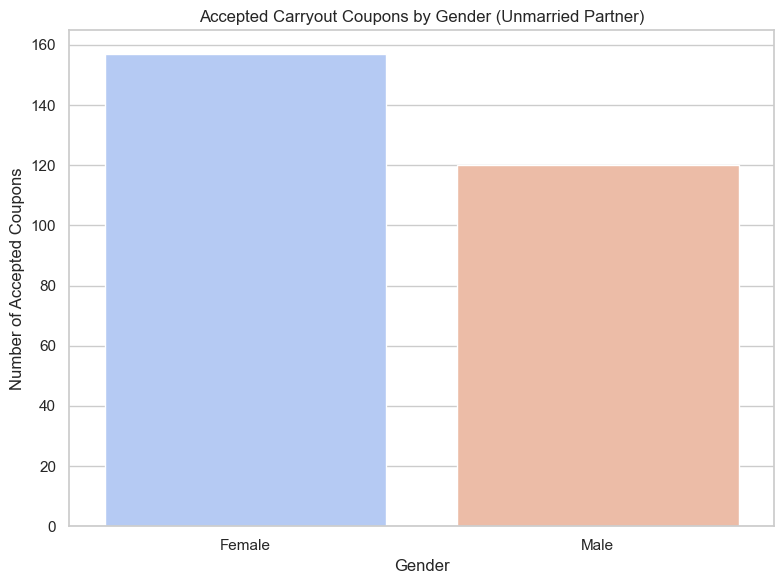

In [88]:
#Compare the acceptance rate between Female drivers and Male drivers

# Filter dataset
filtered_data = data[
    (data['coupon'] == 'Carry out & Take away') &
    (data['Y'] == 1) &
    (data['maritalStatus'] == 'Unmarried partner')
]

# Count accepted coupons by gender
gender_counts = filtered_data['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Accepted Count']

# Plot with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data = gender_counts, x='Gender', y='Accepted Count', hue='Gender', palette='coolwarm', legend=False)

# Add labels and title
plt.title("Accepted Carryout Coupons by Gender (Unmarried Partner)")
plt.ylabel("Number of Accepted Coupons")
plt.tight_layout()
plt.savefig('images/carryout_gender_unmarried.png')
plt.show()

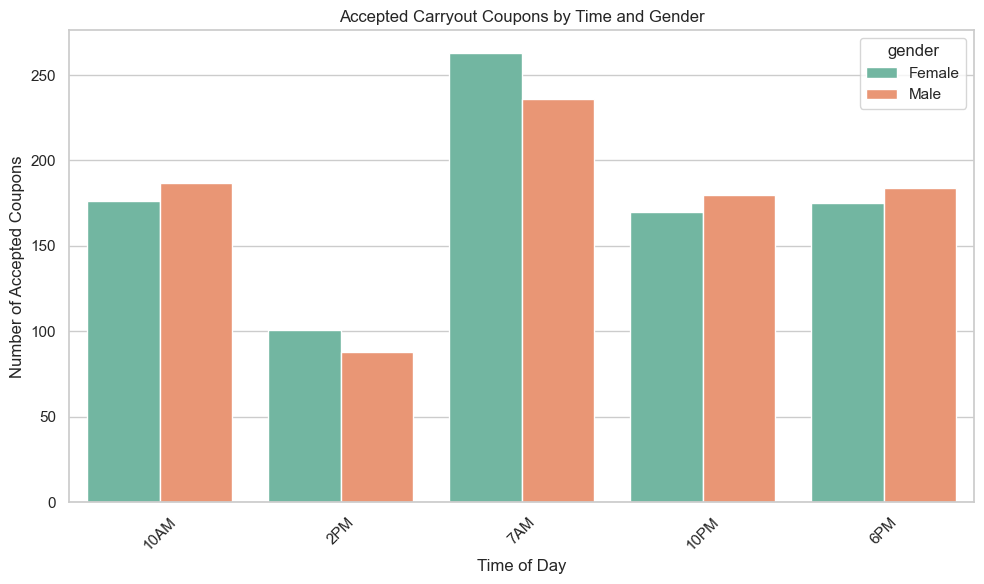

In [56]:
#Let's determine how the Carryout and takeaway coupons' acceptance varies
#across different times of a day for each gender.

# Filter for accepted Carry out & Take away coupons
carryout_accepted = data[
    (data['coupon'] == 'Carry out & Take away') &
    (data['Y'] == 1)
]

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=carryout_accepted, x='time', hue='gender', palette='Set2')

# Add labels and title
plt.title("Accepted Carryout Coupons by Time and Gender")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accepted Coupons")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/carryout_time_gender.png')
plt.show()

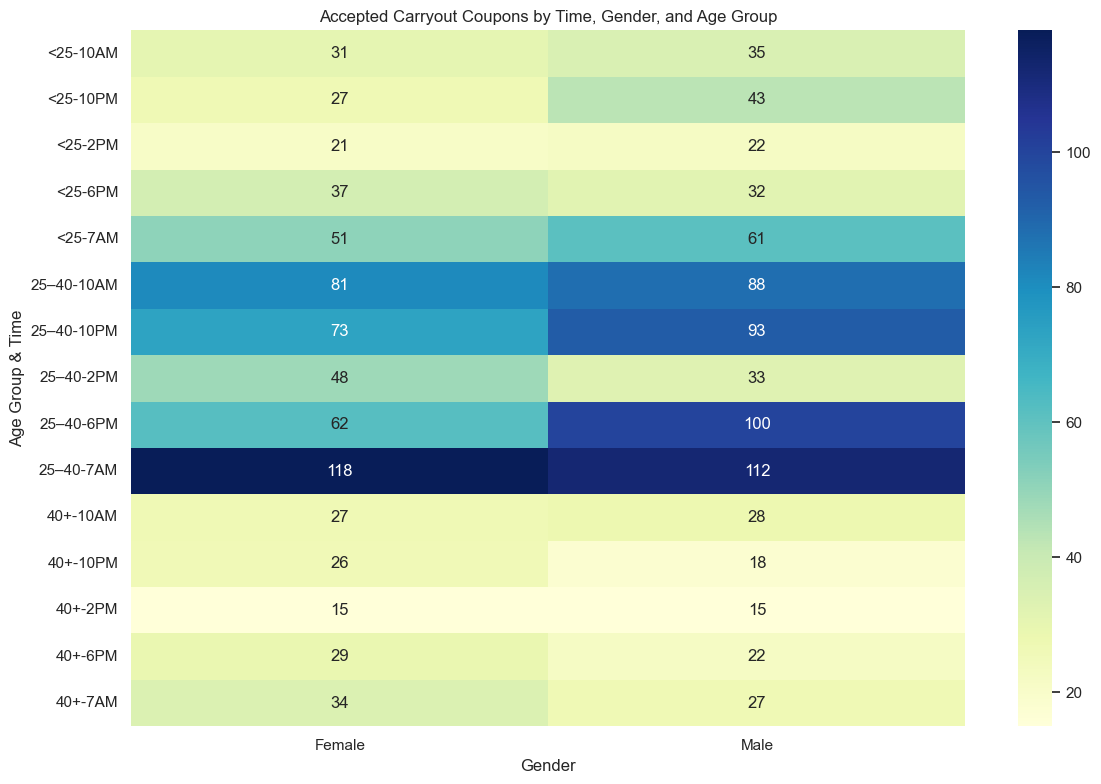

In [89]:
# Now, let’s build a heatmap that shows how accepted Carry out & Take away coupons vary by
#time of day, gender, and age group. This will help us spot behavioral clusters
# and timing preferences across demographics.

# Filter for accepted Carry out & Take away coupons
carryout_accepted = data[
    (data['coupon'] == 'Carry out & Take away') &
    (data['Y'] == 1)
].copy()

# Create age groups
bins = [0, 25, 40, 60]
labels = ['<25', '25–40', '40+']
carryout_accepted['age_group'] = pd.cut(carryout_accepted['age'], bins=bins, labels=labels)

# Create pivot table: rows = age_group + time, columns = gender
pivot = carryout_accepted.pivot_table(
    index=['age_group', 'time'],
    columns='gender',
    values='Y',
    aggfunc='count',
    fill_value=0,
    observed = False
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Accepted Carryout Coupons by Time, Gender, and Age Group")
plt.ylabel("Age Group & Time")
plt.xlabel("Gender")
plt.tight_layout()
plt.savefig('images/heatmap_time_gender_age.png')
plt.show()
